# Bias y Varianza


## Bias (Sesgo)
Es la diferencia entre el valor esperado del estimador (el valor predicho por el modelo) y el valor real.
* Se dice que un modelo tiene bias muy alto el modelo es muy simple y no se ajusta a los datos de entrenamiento
* Underfitting
* Generalmente produce un error alto en todas las muestras: Entrenamiento y validación.



### Ejemplo de bias
A continuación vamos a asumir (y por eso el sesgo) que tenemos un modelo lineal para nuestro conjunto de datos de entrenamiento sin embargo, los datos siguen una distribución cúbica con un ligero ruido.
Esta selección simplista del modelo nos lleva a un problema de underfitting, dónde nuestro modelo no se ajusta a nuestros datos de entrenamiento.

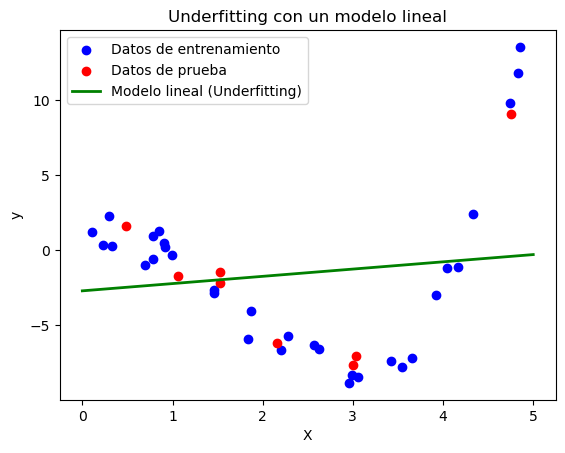

Train MSE: 30.08
Test MSE: 25.16


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generar datos para una función cúbica con ruido
np.random.seed(42)
X = np.sort(5 * np.random.rand(40))
y = X**3 - 5*X**2 + 3*X + 1 + np.random.randn(40)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
X_train = X_train[:, np.newaxis]
model.fit(X_train, y_train)

# Predecir los valores en los conjuntos de entrenamiento y prueba
X_fit_train = np.linspace(0, 5, 100)[:, np.newaxis]
y_fit_train = model.predict(X_fit_train)
y_fit_test = model.predict(X_test[:, np.newaxis])

# Calcular el error cuadrático medio en los conjuntos de entrenamiento y prueba
mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test = mean_squared_error(y_test, y_fit_test)

# Graficar los puntos, la línea del modelo lineal y los datos de prueba
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='red', label='Datos de prueba')
plt.plot(X_fit_train, y_fit_train, color='green', linewidth=2, label='Modelo lineal (Underfitting)')
plt.title('Underfitting con un modelo lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print(f'Train MSE: {mse_train:.2f}')
print(f'Test MSE: {mse_test:.2f}')

El siguiente modelo es un polinomio de grado 3 que a diferencia del modelo lineal, se ajusta mejor a los datos de entrenamiento.

A su vez el modelo tiene un bajo error con el test set.

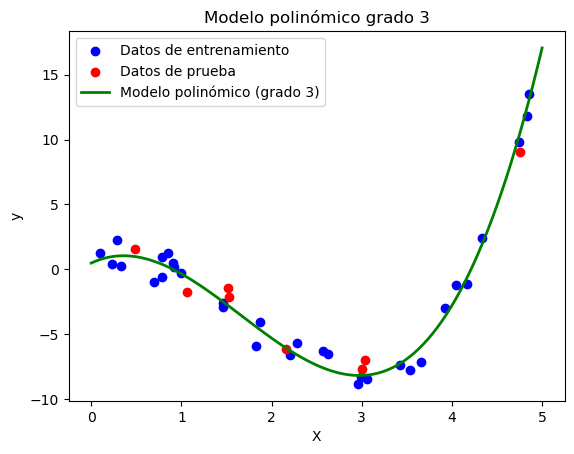

Train MSE: 0.66
Test MSE: 0.96


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generar datos para una función cúbica con ruido
np.random.seed(42)
X = np.sort(5 * np.random.rand(40))
y = X**3 - 5*X**2 + 3*X + 1 + np.random.randn(40)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar un modelo polinómico de tercer grado
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train[:, np.newaxis], y_train)

# Predecir los valores en los conjuntos de entrenamiento y prueba
X_fit_train = np.linspace(0, 5, 100)[:, np.newaxis]
y_fit_train = model.predict(X_fit_train)
y_fit_test = model.predict(X_test[:, np.newaxis])

# Calcular el error cuadrático medio en los conjuntos de entrenamiento y prueba
mse_train = mean_squared_error(y_train, model.predict(X_train[:, np.newaxis]))
mse_test = mean_squared_error(y_test, y_fit_test)

# Graficar los puntos, la curva del modelo polinómico y los datos de prueba
plt.scatter(X_train, y_train, color='blue', label='Datos de entrenamiento')
plt.scatter(X_test, y_test, color='red', label='Datos de prueba')
plt.plot(X_fit_train, y_fit_train, color='green', linewidth=2, label=f'Modelo polinómico (grado {degree})')
plt.title('Modelo polinómico grado 3')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print(f'Train MSE: {mse_train:.2f}')
print(f'Test MSE: {mse_test:.2f}')


### Más ejemplos de bias
El siguiente dataset representa un conjunto conjunto de doctores, y la tarea es predecir basado en esta información si son capaces de realizar una cirugía a corazón abierto a un paciente a  pesar de no estar 100% capacitado.

In [46]:
import pandas as pd
import numpy as np

# Crear un conjunto de datos ficticio
data = {
    'Edad': [45, 32, 50, 28, 60],
    'Presion_Sanguinea': [120, 130, 140, 110, 150],
    'Nivel_Colesterol': [200, 220, 180, 240, 190],
    'Fumador': [0, 1, 0, 0, 1],  # 0: No fumador, 1: Fumador
    'Ejercicio': [3, 1, 2, 4, 1],  # Horas de ejercicio por semana
    'Historial_Familiar': [1, 0, 1, 0, 1],  # 1: Historial familiar de problemas cardíacos, 0: Sin historial
    'Altura': [170, 160, 175, 155, 180],  # Altura en centímetros
    'Numeros_Casas': [2, 1, 3, 2, 4],  # Número de casas propiedad
    'Notas_Universidad': [8.5, 7.2, 9.0, 6.8, 8.9],  # Notas en la universidad
    'Experiencia_Medica': [1, 0, 1, 0, 1],  # 1: Tiene experiencia médica, 0: No tiene experiencia
}

# Añadir una columna para representar la realización de una cirugía de corazón abierto sin ser médico capacitado
data['Cirugia_Corazon'] = [1, 0, 1, 0, 1]  # 1: Realizó cirugía sin ser médico, 0: No realizó cirugía

# Crear un DataFrame
df = pd.DataFrame(data)

# Mostrar el conjunto de datos
df.head()

,Edad,Presion_Sanguinea,Nivel_Colesterol,Fumador,Ejercicio,Historial_Familiar,Altura,Numeros_Casas,Notas_Universidad,Experiencia_Medica,Cirugia_Corazon
0,45,120,200,0,3,1,170,2,8.5,1,1
1,32,130,220,1,1,0,160,1,7.2,0,0
2,50,140,180,0,2,1,175,3,9.0,1,1
3,28,110,240,0,4,0,155,2,6.8,0,0
4,60,150,190,1,1,1,180,4,8.9,1,1


###  Se puede realizar alguno de los siguientes casos:
* Seleccionar un modelo simple que no represente el comportamiento del fenómeno natural
* No usar los features correctamente. Quizá el modelo esté usando features incorrectos (altura)
* Se ignora información importante de otros features (experiencia médica, notas de la universidad)

## Varianza
Se refiere a la sensibilidad del modelo a las variaciones en los datos de entrenamiento. 
* Si tenemos un alta varianza somos sensibles a las pequeñas fluctuaciones perdiendo la generalización del modelo, y por consecuencia a la predicción del modelo.
* Overfitting

### Ejemplo de varianza
Utilizar un polinomio de grado muy elevado

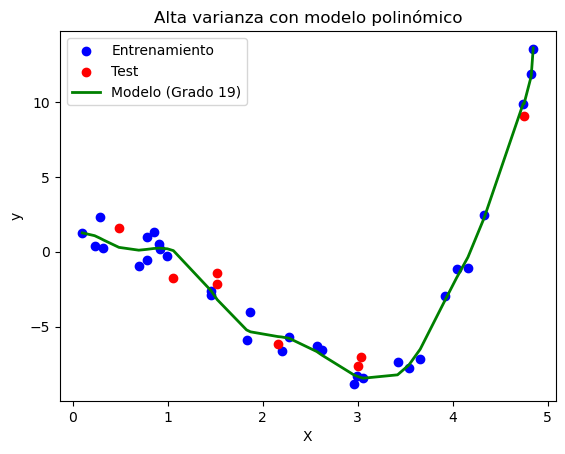

Train MSE: 0.39
Test MSE: 1.56


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generar datos para una función cúbica con ruido
np.random.seed(42)
X = np.sort(5 * np.random.rand(40))
y = X**3 - 5*X**2 + 3*X + 1 + np.random.randn(40)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar un modelo polinómico de grado elevado (varianza alta)
degree = 19
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train[:, np.newaxis], y_train)

# Predecir los valores en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train[:, np.newaxis])
y_test_pred = model.predict(X_test[:, np.newaxis])

# Calcular el error cuadrático medio en los conjuntos de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Graficar los puntos, la curva del modelo y la evaluación del modelo
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.plot(X, model.predict(X[:, np.newaxis]), color='green', linewidth=2, label=f'Modelo (Grado {degree})')
plt.title('Alta varianza con modelo polinómico')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print(f'Train MSE: {mse_train:.2f}\nTest MSE: {mse_test:.2f}')

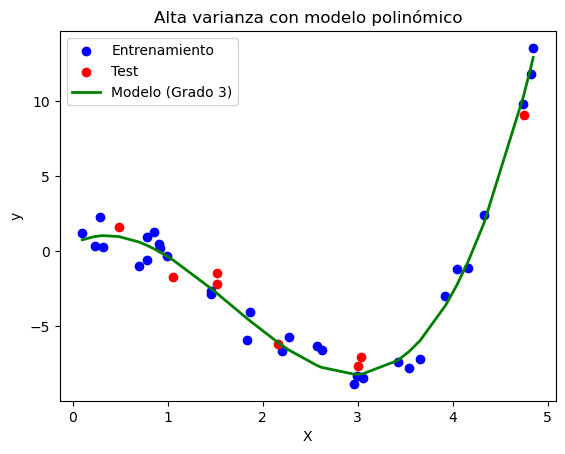

Train MSE: 0.66
Test MSE: 0.96


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generar datos para una función cúbica con ruido
np.random.seed(42)
X = np.sort(5 * np.random.rand(40))
y = X**3 - 5*X**2 + 3*X + 1 + np.random.randn(40)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar un modelo polinómico de grado elevado (varianza alta)
degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train[:, np.newaxis], y_train)

# Predecir los valores en los conjuntos de entrenamiento y prueba
y_train_pred = model.predict(X_train[:, np.newaxis])
y_test_pred = model.predict(X_test[:, np.newaxis])

# Calcular el error cuadrático medio en los conjuntos de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Graficar los puntos, la curva del modelo y la evaluación del modelo
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_test, y_test, color='red', label='Test')
plt.plot(X, model.predict(X[:, np.newaxis]), color='green', linewidth=2, label=f'Modelo (Grado {degree})')
plt.title('Alta varianza con modelo polinómico')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

print(f'Train MSE: {mse_train:.2f}\nTest MSE: {mse_test:.2f}')

### Más ejemplo de Varianza
* Mismo conjunto de datos que el anterior, pero esta vez decidimos utilizar un modelo super complejo (Arboles de decisión o una red neuronal muy grande).
* Los valores de entrenamiento nos dan un error muy bajo.


In [48]:
df.head()

,Edad,Presion_Sanguinea,Nivel_Colesterol,Fumador,Ejercicio,Historial_Familiar,Altura,Numeros_Casas,Notas_Universidad,Experiencia_Medica,Cirugia_Corazon
0,45,120,200,0,3,1,170,2,8.5,1,1
1,32,130,220,1,1,0,160,1,7.2,0,0
2,50,140,180,0,2,1,175,3,9.0,1,1
3,28,110,240,0,4,0,155,2,6.8,0,0
4,60,150,190,1,1,1,180,4,8.9,1,1


### ¿Que puede salir mal en este caso?
* Sobreentrenamos el modelo, al punto que nuestro modelo aprendió cada ruido de nuestro conjunto de datos de entrenamiento, y al momento de probarlo con datos que no ha visto, no es capaz de predecir correctamente (Overfitting)
* Utilizamos un modelo complejo

### ¿Cómo lo podemos corregir?
* Usando un modelo más simple
* Más datos de entrenamiento (no siempre se puede)
* Reducir la dimensionalidad (Hay técnicas para esto)
* Tecnicas de regularización (Veremos más adelante)
* EarlyStopping del entrenamiento (evitamos overfitting)


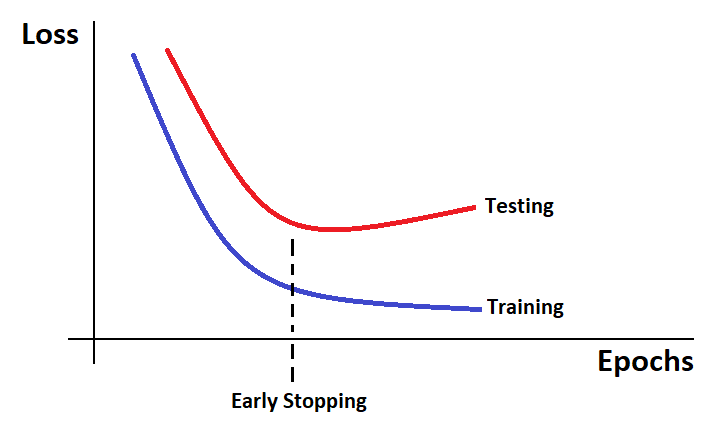

## Resumen
Lo optimo que queremos tener un nuestro modelo es que tenga poco bias, y poca varianza, para tener un modelo robusto.

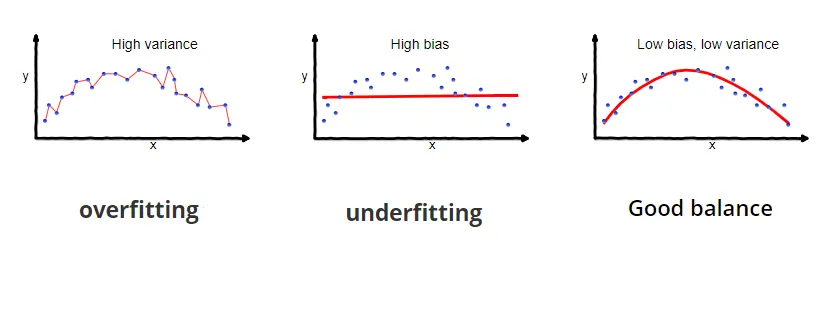

* Entre más complejo es el modelo vamos a tener una mayor varianza en los resultados, pero un menor sesgo.
* Entre más simple el modelo la varianza es baja pero tiene un mayor sesgo.
* El modelo optimo es el que se encuentra haciendo un trade-off entre la varianza y el sesgo.

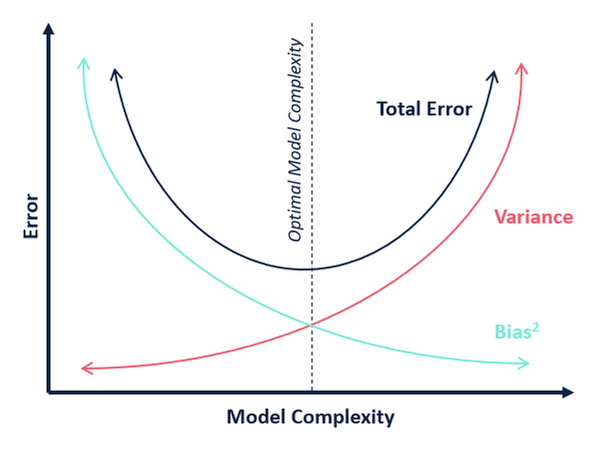

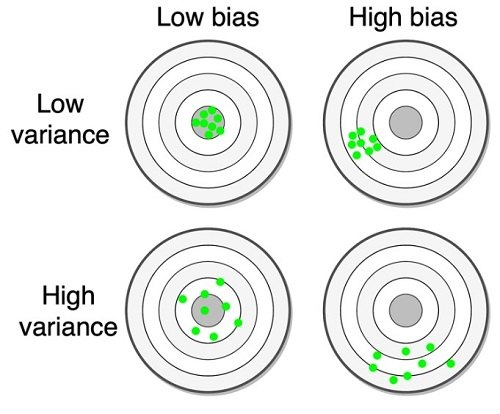